## Movies Analytics

Probing the dataset of popular movies from the 1990s to 2021, this project seeks to discover the important factors of a movie that tends to affect the gross earning of the movie.

In [1]:
#Importing necessary Python libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of plots to be created

In [2]:
 # read in data
    
df = pd.read_csv(r'movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning the Data

In [4]:
# Checking for missing data

for col in df.columns:
    avg_missing = (np.mean(df[col].isnull()))
    print('{} - {}%'.format(col, avg_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [6]:
# dropping rows with missing data
df.dropna()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [7]:
df.dropna().isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7649,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df = df.dropna()

In [9]:
# Checking for missing data

for col in df.columns:
    avg_missing = (np.mean(df[col].isnull()))
    print('{} - {}%'.format(col, avg_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


### Reformating data types  

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# formating budget, gross, score and votes columns to int

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')



In [12]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

### FIxing inconsistent dates between 'release date' and 'year'

It was noticed that the year of release in the 'year' column was inconsistent with that in the date of release column.

A new 'year of release' column will have to be created from the 'release' column and the old 'year' column dropped to roll back this irregularity. 

In [14]:
pd.set_option('display.max_rows', 500)

In [15]:
#splittin the country from the released column
# This sets up the date of release column for proper slicing
df[['released','country_trans']] = df['released'].str.split('(',expand=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_trans
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,United States)
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,United States)
7650,Dolittle,PG,Adventure,2020,"January 17, 2020",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,United States)
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,United States)


In [16]:
#slicing the year from the new 'released' column
df['year_correct'] = df['released'].astype(str).str[-5:-1]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_trans,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,United States),2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,United States),2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,United States),2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,United States),2020


### Ordering by gross revenue

In [17]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_trans,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,Sweden),2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,South Korea),1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,Canada),2001
272,Parasite,R,Horror,1982,"March 12, 1982",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,United States),1982


In [18]:
# dropping the old 'year' column and the transitional 'country_trans'
del df['year']
del df['country_trans']

In [19]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


### Duplicates



In [20]:
# dropping any duplicates
df = df.drop_duplicates()

## Probing the dataset

### Discovering which factors are likely to affect the gross revenue of movies

Hypothesis 1: Budget has a high correlation


Hypothesis 2: Company has a high correlation


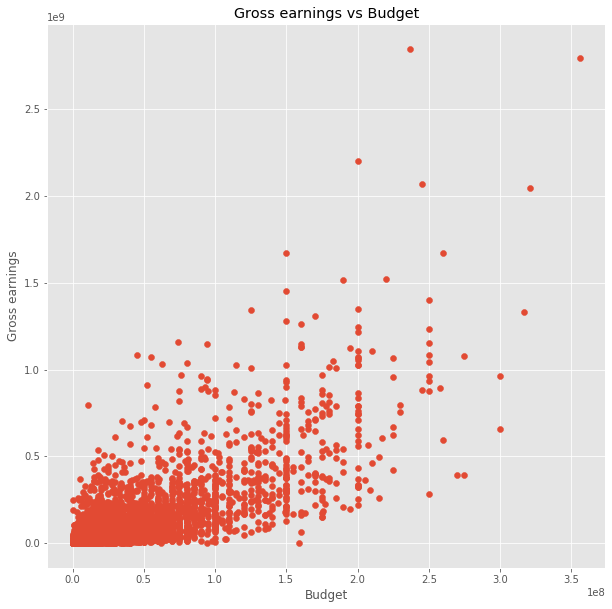

In [21]:
#Testing the hypotheses

#Scatter plot for Budget vs gross

plt.figure(figsize=(10,10))
plt.scatter(x=df['budget'], y=df['gross'] )
plt.title('Gross earnings vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

In [22]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [23]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


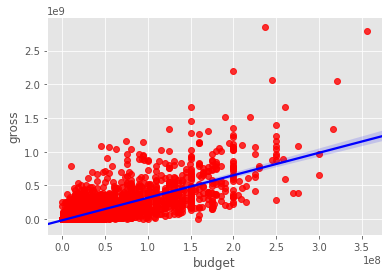

In [24]:
# Plot gross vs budget using seaborn

sns.regplot(x= 'budget', y = 'gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [25]:
# Looking at correlation

df.corr(method = 'pearson') #pearson #Kendall #spearman

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


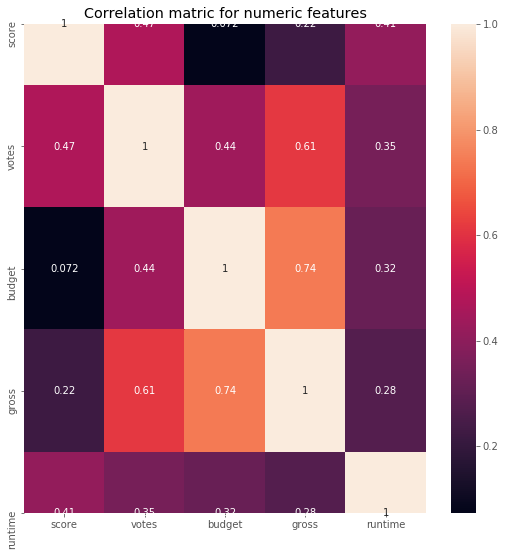

In [26]:
correlation_matrix = df.corr(method = 'pearson')

plt.figure(figsize=(9,9))
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix, annot = True)
plt.show()

### Budget and Gross earnings(Hypothesis 1)

From the correlation plot and heat map, it has been observed that the budget of a movie has a high positive correlation with the gross earnings from that movie. High budget for a movie has the tendency to translate to equally high earnings.

In [27]:
#Looking at company

# Giving objects in a str column unique numerical values

df1 = df
str_numeric = df1

for col_names in str_numeric.columns:
    if(str_numeric[col_names].dtype == 'object'):
        str_numeric[col_names]=str_numeric[col_names].astype('category')
        str_numeric[col_names]=str_numeric[col_names].cat.codes
        
        
str_numeric

df_numeric = str_numeric

In [28]:
df_numeric

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,496,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,124,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,502,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,498,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,132,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,847,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,35
2434,2969,5,0,1386,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,14
3681,1595,3,6,1628,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,21
272,2909,6,9,1442,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2


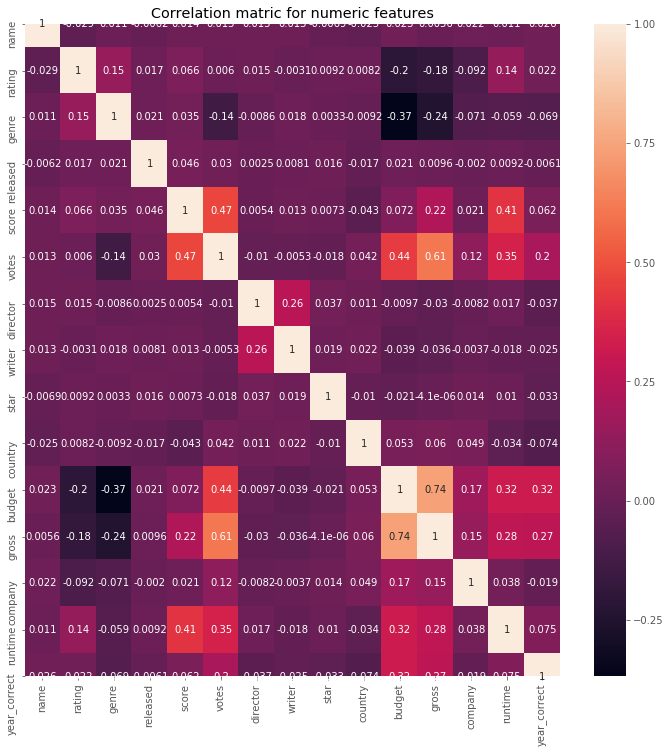

In [29]:
correlation_matrix2 = df_numeric.corr(method = 'pearson')

plt.figure(figsize=(12,12))
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix2, annot = True)
plt.show()

In [30]:
df_numeric.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,-0.006155,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.017349,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.021321,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006155,0.017349,0.021321,1.000000,0.046091,0.029593,0.002481,0.008145,0.015558,-0.017043,0.021144,0.009643,-0.001996,0.009234,-0.006091
score,0.014450,0.065983,0.035106,0.046091,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.029593,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002481,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008145,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015558,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017043,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


In [31]:
#correlation by columns
corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              released       -0.006155
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              released        0.017349
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star            0.009196
              country         0.008230
              budget     

In [32]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
gross         rating         -0.181906
rating        gross          -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
rating        company        -0.092357
company       rating         -0.092357
country       year_correct   -0.073569
year_correct  country        -0.073569
company       genre          -0.071334
genre         company        -0.071334
year_correct  genre          -0.069147
genre         year_correct   -0.069147
runtime       genre          -0.059237
genre         runtime        -0.059237
country       score          -0.043051
score         country        -0.043051
budget        writer         -0.039466
writer        budget         -0.039466
director      year_correct   -0.037371
year_correct  director   

In [33]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

### Company and Gross earnings (Hypothesis 2)
From the correlation plot and heat map, it has been observed that the company producing a movie has a low positive correlation with the gross earnings from the movie.

## Conclusion

Votes and Budget have the highest correlation to gross earnings of a movie. The higher the votes and budget the higher the gross earnings.

The company producing the movie has a low correlation.No relationship of note with the gross earning of a movie.

Hypothesis 1 is correct

Hypothesis 2 is wrong